## Classification Example in Hands on ML

In [77]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

c:\Users\kioia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

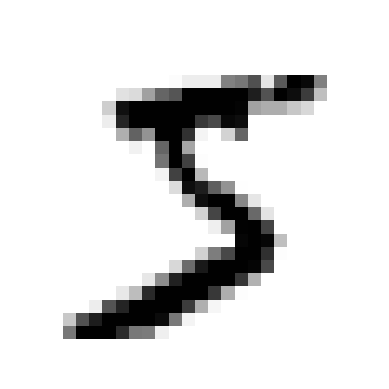

In [43]:
some_digit = np.array(X)[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [44]:
y[0]

'5'

In [45]:
y=y.astype(np.uint8)

## Building the model

In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [47]:
X_train, X_test, y_train, y_test = X[:60000], X[:60000], y[:60000], y[:60000]

In [50]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [51]:
sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=1234)

In [53]:
sgd_clf.predict([some_digit])

c:\Users\kioia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [57]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96855, 0.95705, 0.96055])

In [72]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(seld, X):
        return np.zeros((len(X), 1), dtype=bool)

In [73]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [78]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
pd.DataFrame(confusion_matrix(y_true=y_train_5, y_pred=y_train_pred))

,0,1
0,53427,1152
1,1125,4296
